In [2]:
# Saving my account
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum", token='eb5fe0c762d132091c285adbdf47491c759652b945d84205fabb6ba26180b8dc9d306b1346316957be8621ebe0cc47cbdc13867c566df1b01ad9a0e4da08b4f4')

# Using my computer as a simulator for a basic quantum circuit

Resultant probability distribution: {'00': 0.4999999999999999, '11': 0.4999999999999999}


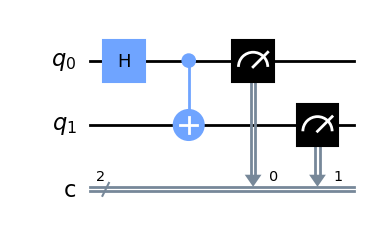

In [3]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler as QS

circuit = QuantumCircuit(2,2) # 2 qubits, 2 classical bits.
circuit.h(0) # Adding a H gate to qubit 0 (the gate that continuously allows the bits to exist in superposition)
circuit.cx(0, 1) # Mapping CX i.e. CNOT gate on control Qbit 0 and target qbit 1. So if q0 is at 0, 1 will be at 0. But if q0 is at 1, 1 becomes 1.
circuit.measure([0,1], [0,1]) # Measuring the qubits and storing the result in classical bits 0 and 1.

sampler = QS()
job = sampler.run(circuit)

# Note: binary_probabilitiies() ensures that the probabilities (00 and 11) are shown in binary rather than decimal numbers
probability = job.result().quasi_dists[0].binary_probabilities()
print(f"Resultant probability distribution: {probability}")

# Plotting the circuit
circuit.draw(output='mpl')

# On a real device, with the probability of noise:

In [4]:
# View backend options
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
service2 = QiskitRuntimeService(channel='ibm_cloud')

print(f"{service.backends()}\n\n{service2.backends()}")

AccountNotFoundError: 'No default ibm_cloud account saved.'